In [5]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


The system cannot find the path specified.


In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore", category=FutureWarning)

import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import ticker
import seaborn as sns
import builtins
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

custom_palette = ['#10002B', '#240046', '#3C096C', '#5A189A', '#7B2CBF', '#9D4EDD', '#C77DFF', '#E0AAFF']
custom_palette_reverse = custom_palette.reverse()
sns.set_palette(custom_palette_reverse)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
data_path = os.path.join('..', 'data', 'DCCC.csv')
data = pd.read_csv(data_path, header=1)
data.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)
data.rename(columns={'PAY_2': 'PAY_1'}, inplace=True)
data.rename(columns={'PAY_3': 'PAY_2'}, inplace=True)
data.rename(columns={'PAY_4': 'PAY_3'}, inplace=True)
data.rename(columns={'PAY_5': 'PAY_4'}, inplace=True)
data.rename(columns={'PAY_6': 'PAY_5'}, inplace=True)
data.drop('ID', axis=1, inplace=True)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Missing Data Exploration and Handling


In [ ]:
data.shape

(30000, 24)

In [ ]:
for col in data.columns:
    num_missing = data[col].isnull().sum()
    num_unique = data[col].nunique()
    num_total = data.shape[0]
    print(f'{col} has {num_unique} unique values and {(num_missing/num_total)*100:.2f}% of the data is missing.')

LIMIT_BAL has 81 unique values and 0.00% of the data is missing.
SEX has 2 unique values and 0.00% of the data is missing.
EDUCATION has 7 unique values and 0.00% of the data is missing.
MARRIAGE has 4 unique values and 0.00% of the data is missing.
AGE has 56 unique values and 0.00% of the data is missing.
PAY_0 has 11 unique values and 0.00% of the data is missing.
PAY_1 has 11 unique values and 0.00% of the data is missing.
PAY_2 has 11 unique values and 0.00% of the data is missing.
PAY_3 has 11 unique values and 0.00% of the data is missing.
PAY_4 has 10 unique values and 0.00% of the data is missing.
PAY_5 has 10 unique values and 0.00% of the data is missing.
BILL_AMT1 has 22723 unique values and 0.00% of the data is missing.
BILL_AMT2 has 22346 unique values and 0.00% of the data is missing.
BILL_AMT3 has 22026 unique values and 0.00% of the data is missing.
BILL_AMT4 has 21548 unique values and 0.00% of the data is missing.
BILL_AMT5 has 21010 unique values and 0.00% of the da

In [ ]:
categorical_columns = ['SEX','EDUCATION', 'MARRIAGE']
categorical_columns += [f'PAY_{i}' for i in range(0,6)]
for col in categorical_columns:
    print(f'Unique Values in {col}:', sorted(data[col].unique()))

Unique Values in SEX: [1, 2]
Unique Values in EDUCATION: [0, 1, 2, 3, 4, 5, 6]
Unique Values in MARRIAGE: [0, 1, 2, 3]
Unique Values in PAY_0: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Unique Values in PAY_1: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Unique Values in PAY_2: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Unique Values in PAY_3: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Unique Values in PAY_4: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
Unique Values in PAY_5: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
data['EDUCATION'].replace({0:4, 5:4, 6:4}, inplace=True)
data['MARRIAGE'].replace({0:3}, inplace=True)

pay_columns = [f'PAY_{i}' for i in range(0, 6)]
for col in pay_columns:
    data[col].replace({-2:-1, -1:0, 0:1, 1:2, 2:3, 3:4, 4:5, 5:6, 6:7, 7:8, 8:9}, inplace=True)
for col in categorical_columns:
    print(f"Unique Values in '{col}' updated to:", sorted(data[col].unique()))

Unique Values in 'SEX' updated to: [1, 2]
Unique Values in 'EDUCATION' updated to: [1, 2, 3, 4]
Unique Values in 'MARRIAGE' updated to: [1, 2, 3]
Unique Values in 'PAY_0' updated to: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Unique Values in 'PAY_1' updated to: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Unique Values in 'PAY_2' updated to: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Unique Values in 'PAY_3' updated to: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Unique Values in 'PAY_4' updated to: [-1, 0, 1, 3, 4, 5, 6, 7, 8, 9]
Unique Values in 'PAY_5' updated to: [-1, 0, 1, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
for col in categorical_columns:
    data[col] = data[col].astype('category')

## Exploratory Analysis


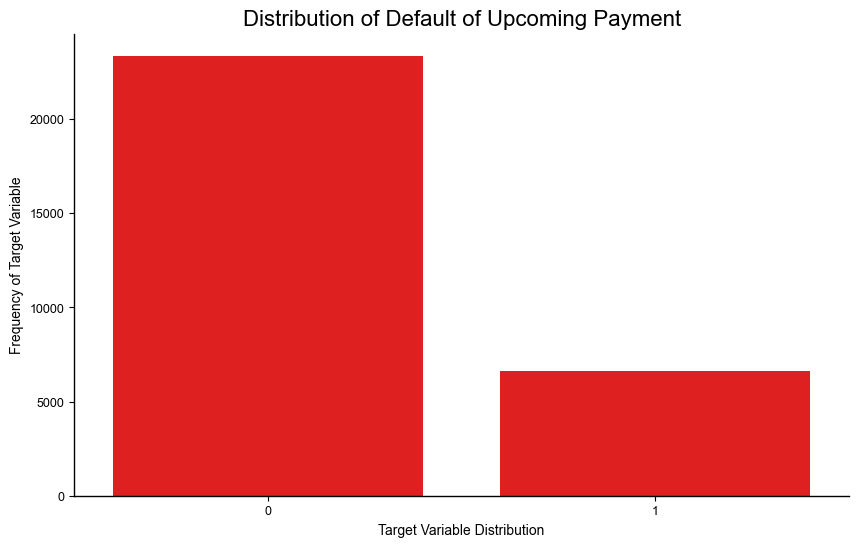

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='DEFAULT')
plt.title('Distribution of Default of Upcoming Payment', fontsize=16)
plt.xlabel('Target Variable Distribution')
plt.ylabel('Frequency of Target Variable')
plt.show()

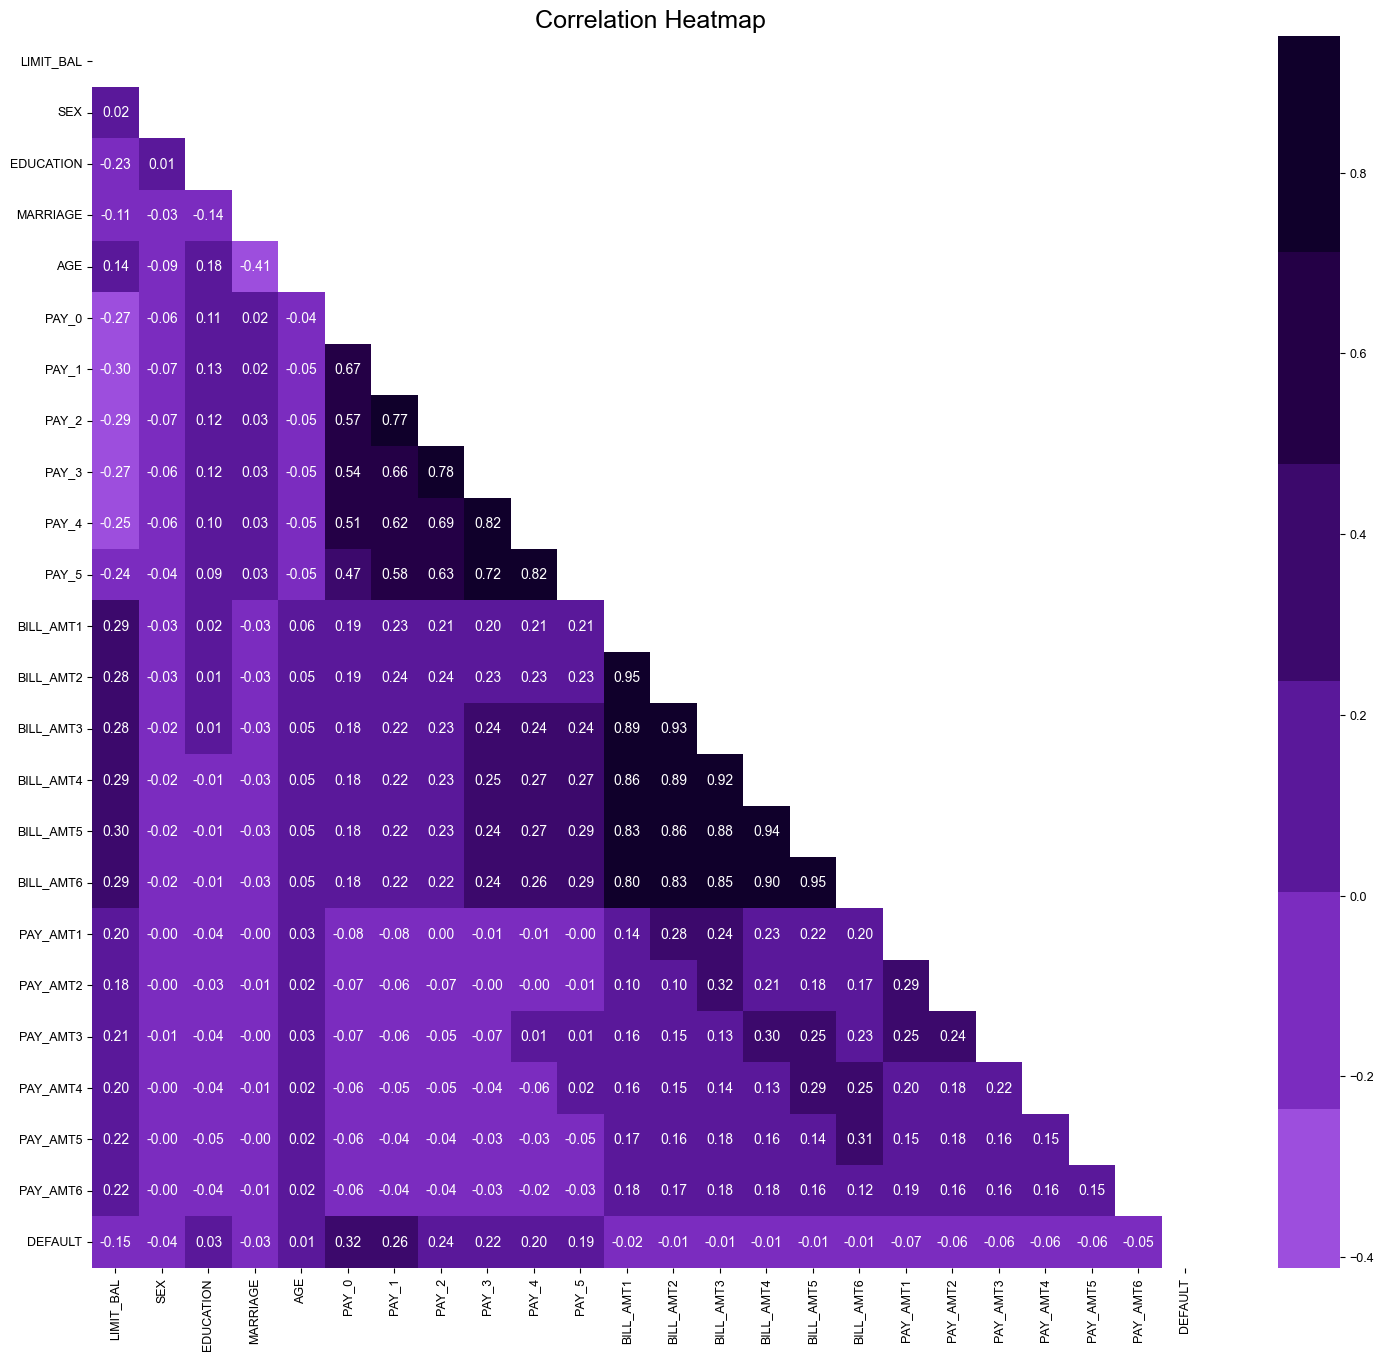

In [ ]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = LinearSegmentedColormap.from_list('custom_heatmap', custom_palette, N=256)
plt.figure(figsize=(18, 16))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=custom_palette, center=0)
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

In [ ]:
# Histograms for numerical features
numerical_features = ['LIMIT_BAL', 'AGE'] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]
scaler = StandardScaler()

data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [ ]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [ ]:


X = data.drop('DEFAULT', axis=1)
y = data['DEFAULT']

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)


ModuleNotFoundError: No module named 'imblearn'

## Feature Scaling


In [ ]:
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [ ]:
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
rforest = RandomForestClassifier(n_estimators=100, random_state=42)
rforest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_log = log_reg.fit(X_test)
y_proba_log = log_reg.predict_proba(X_test)[:, 1]

y_pred_dtree = dtree.predict(X_test)
y_proba_dtree = dtree.predict_proba(X_test)[:, 1]

y_pred_rforest = rforest.predict(X_test)
y_proba_rforest = rforest.predict_proba(X_test)[:, 1]

TypeError: LogisticRegression.fit() missing 1 required positional argument: 'y'

In [ ]:
print("Logistical Regression Classification Report:")
print(classification_report(y_test, y_pred_log))